In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../Dataset/gurgaon_properties_missing_value_imputation.csv")

In [4]:
df.shape

(3554, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ardee city,sector 52,1.55,7381.0,4,4,3,1.0,Moderately Old,2100.00,0,0,0,0,0,1,0
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,2,2,1,10.0,Relatively New,577.78,0,0,0,0,0,1,15
2,flat,experion windchants,sector 112,3.65,11428.0,3,5,2,3.0,Relatively New,2800.00,0,1,0,0,0,1,72
3,flat,parsvnath exotica,sector 53,4.80,16580.0,3,4,3+,8.0,Relatively New,2500.00,0,1,0,1,1,2,174
4,flat,emaar palm gardens,sector 83,1.76,9263.0,3,3,3,6.0,Relatively New,1500.00,0,1,0,0,0,2,165


Obervation
* price_per_sqft is highly related to price.
* we will ask user what is your prefered sector, number of bhk. we will nost gonna ask what is your expected price_per_sqrt.
* we will not ask what is the society you are looking if user knows he will go to any website or physically go to society and can check the price. it is also not logicla to ask.
* therefore, dropping these 2 columns

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

## Luxury score

Approach
* luxury score is a continuous number and we don't what what a score represent. i.e, is 45 means it is at medium level or high level. So will categorize the luxury colum into low, medium, high level

<Axes: xlabel='luxury_score'>

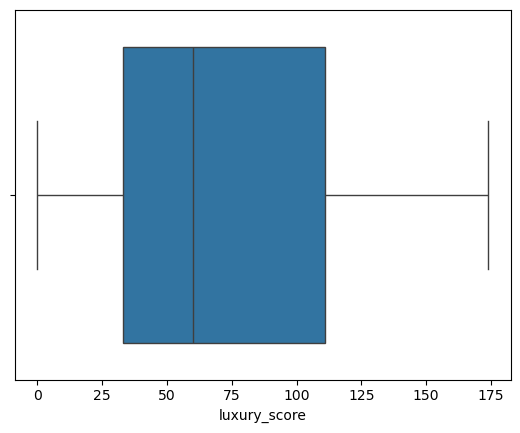

In [7]:
sns.boxplot(x = df['luxury_score'])

In [8]:
print(df['luxury_score'].min())
print(df['luxury_score'].max())

0
174


In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 52,1.55,4,4,3,1.0,Moderately Old,2100.00,0,0,0,0,0,1,0,Low
1,flat,sector 86,0.50,2,2,1,10.0,Relatively New,577.78,0,0,0,0,0,1,15,Low
2,flat,sector 112,3.65,3,5,2,3.0,Relatively New,2800.00,0,1,0,0,0,1,72,Medium
3,flat,sector 53,4.80,3,4,3+,8.0,Relatively New,2500.00,0,1,0,1,1,2,174,High
4,flat,sector 83,1.76,3,3,3,6.0,Relatively New,1500.00,0,1,0,0,0,2,165,High


In [12]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 52,1.55,4,4,3,1.0,Moderately Old,2100.00,0,0,0,0,0,1,0,Low
1,flat,sector 86,0.50,2,2,1,10.0,Relatively New,577.78,0,0,0,0,0,1,15,Low
2,flat,sector 112,3.65,3,5,2,3.0,Relatively New,2800.00,0,1,0,0,0,1,72,Medium
3,flat,sector 53,4.80,3,4,3+,8.0,Relatively New,2500.00,0,1,0,1,1,2,174,High
4,flat,sector 83,1.76,3,3,3,6.0,Relatively New,1500.00,0,1,0,0,0,2,165,High


## floor num

Approach
* Here also categorizing the floor number

<Axes: xlabel='floorNum'>

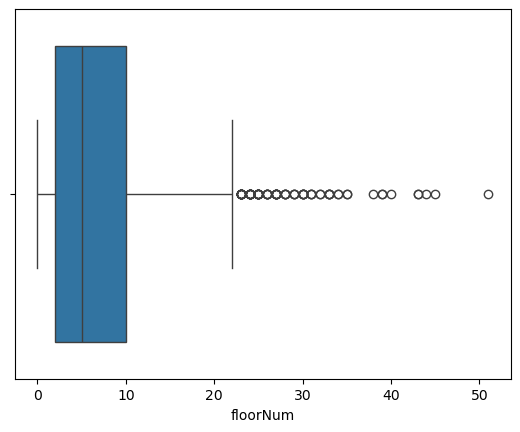

In [13]:
sns.boxplot(x = df['floorNum'])

In [14]:
print(df['floorNum'].min())
print(df['floorNum'].max())

0.0
51.0


In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 52,1.55,4,4,3,Moderately Old,2100.00,0,0,0,0,0,1,Low,Low Floor
1,flat,sector 86,0.50,2,2,1,Relatively New,577.78,0,0,0,0,0,1,Low,Mid Floor
2,flat,sector 112,3.65,3,5,2,Relatively New,2800.00,0,1,0,0,0,1,Medium,Mid Floor
3,flat,sector 53,4.80,3,4,3+,Relatively New,2500.00,0,1,0,1,1,2,High,Mid Floor
4,flat,sector 83,1.76,3,3,3,Relatively New,1500.00,0,1,0,0,0,2,High,Mid Floor


Storing the traing data. it will be helpful to create pipeline in streamlit

In [19]:
train_df.to_csv('../Dataset/gurgaon_properties_post_feature_selectionv2.csv', index=False)

* we will encode all the category into numbers because machine can't understand string.
* we will use ordinal encoding. tree based model will work because by seeing 0 it will not consider that it is less important and 1 is more important. It will put cuts on your dataset and divide into region, but in case of liner model this will not reliable becuase linear model will assume the importance based on the number like if it is 3 then it is more importance than 1 for each column, so, you should use One hot encoding.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [20]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,61.0,4,4,3.0,0.0,2100.00,0,0,0,0,0,1,1.0,1.0
1,0.0,100.0,2,2,1.0,3.0,577.78,0,0,0,0,0,1,1.0,2.0
2,0.0,18.0,3,5,2.0,3.0,2800.00,0,1,0,0,0,1,2.0,2.0
3,0.0,62.0,3,4,4.0,3.0,2500.00,0,1,0,1,1,2,0.0,2.0
4,0.0,97.0,3,3,3.0,3.0,1500.00,0,1,0,0,0,2,0.0,2.0


In [21]:
X_label.shape

(3554, 15)

## Technique 1 - Correlation Analysis

<Axes: >

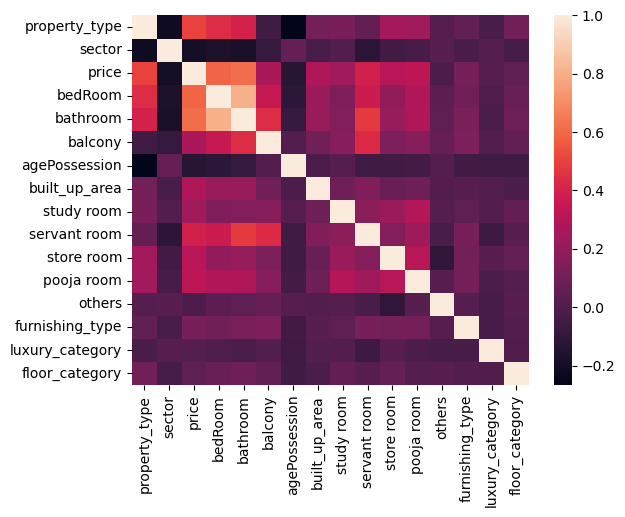

In [22]:
 sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.200132
1,price,1.000000
2,bedRoom,0.588853
3,bathroom,0.611731
4,balcony,0.271621
5,agePossession,-0.136433
6,built_up_area,0.285165
7,study room,0.240637
8,servant room,0.393253
9,store room,0.309168


## Technique 2 - Random Forest Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.621559
1,sector,0.112157
0,property_type,0.105148
3,bathroom,0.035004
2,bedRoom,0.033328
8,servant room,0.021115
5,agePossession,0.012966
4,balcony,0.012197
12,furnishing_type,0.009850
13,luxury_category,0.007738


## Technique 3 - Gradient Boosting Feature importances


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.662842
1,sector,0.110100
0,property_type,0.105268
2,bedRoom,0.040056
3,bathroom,0.039654
8,servant room,0.023468
9,store room,0.006743
12,furnishing_type,0.002806
7,study room,0.002003
5,agePossession,0.001911


## Technique 4 - Permutation Importance

You jumble each column value and do the predcition, if the prediction goes down then the column has more importance if it remains unchanged then it has less importance.

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.612919
0,property_type,0.166979
1,sector,0.135710
2,bedRoom,0.045910
8,servant room,0.023058
3,bathroom,0.021586
9,store room,0.002905
14,floor_category,0.002899
13,luxury_category,0.000575
11,others,0.000084


## Technique 5 - LASSO

Will use linear model just to show that after Ordinal Encoding it is not that reliable.

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
0,property_type,0.766613
3,bathroom,0.623684
2,bedRoom,0.408719
8,servant room,0.394722
6,built_up_area,0.360854
9,store room,0.254011
7,study room,0.222342
10,pooja room,0.128347
13,luxury_category,0.072907
4,balcony,0.063476


## Technique 6 - RFE

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.624364
1,sector,0.107431
0,property_type,0.104318
2,bedRoom,0.035193
3,bathroom,0.030433
8,servant room,0.022092
5,agePossession,0.014034
4,balcony,0.013386
12,furnishing_type,0.009690
13,luxury_category,0.007926


## Technique 7 - Linear Regression Weights

In [29]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
0,property_type,0.772084
3,bathroom,0.621317
2,bedRoom,0.409140
8,servant room,0.397667
6,built_up_area,0.367950
9,store room,0.256631
7,study room,0.228757
10,pooja room,0.131610
13,luxury_category,0.082677
4,balcony,0.070332


## Technique 8 - SHAP

In [30]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.44441706,  0.23255613, -0.02329374, ..., -0.03111983,
        -0.01250072, -0.03153077],
       [-0.19654202, -0.2794479 , -0.07350068, ..., -0.00843752,
        -0.0028679 , -0.00492033],
       [-0.67404987,  0.11226538, -0.00851374, ..., -0.02149761,
        -0.00612812, -0.02931416],
       ...,
       [ 0.44068907,  0.13932783, -0.04857282, ..., -0.0153146 ,
        -0.00948933, -0.01546343],
       [-0.19531275, -0.43636737, -0.06474993, ..., -0.00933012,
        -0.00275946, -0.00299313],
       [-0.35552004,  0.24094397, -0.03949872, ...,  0.01027608,
         0.00112484,  0.13344653]])

In [31]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.194146
0,property_type,0.478237
1,sector,0.403006
3,bathroom,0.173615
8,servant room,0.105815
2,bedRoom,0.080933
4,balcony,0.038719
12,furnishing_type,0.025795
14,floor_category,0.025624
5,agePossession,0.025268


In [32]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')


In [33]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.200132,0.112157,0.110100,0.135710,-0.123598,0.107431,-0.131173,0.403006
bedRoom,0.588853,0.033328,0.040056,0.045910,0.408719,0.035193,0.409140,0.080933
bathroom,0.611731,0.035004,0.039654,0.021586,0.623684,0.030433,0.621317,0.173615
balcony,0.271621,0.012197,0.001712,-0.000286,0.063476,0.013386,0.070332,0.038719
agePossession,-0.136433,0.012966,0.001911,-0.002407,-0.014841,0.014034,-0.022256,0.025268
built_up_area,0.285165,0.621559,0.662842,0.612919,0.360854,0.624364,0.367950,1.194146
study room,0.240637,0.007575,0.002003,-0.000423,0.222342,0.007510,0.228757,0.020082
servant room,0.393253,0.021115,0.023468,0.023058,0.394722,0.022092,0.397667,0.105815
store room,0.309168,0.006406,0.006743,0.002905,0.254011,0.006349,0.256631,0.015556


In [34]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [35]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)


feature
built_up_area      0.684452
sector             0.143706
bathroom           0.044836
bedRoom            0.042789
servant room       0.030281
balcony            0.009640
agePossession      0.008239
store room         0.006502
floor_category     0.006467
furnishing_type    0.006367
study room         0.005589
luxury_category    0.005478
pooja room         0.003258
others             0.002397
dtype: float64

* pooja room, study room, others has very less importance so drop it before droping do a verification if the prediction is changing or not.

In [36]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [37]:
scores.mean()

0.7861367725707005

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
scores.mean()

0.7894698822180208

In [39]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [40]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,61.0,4,4,3.0,0.0,2100.00,0,0,1,1.0,1.0,1.55
1,0.0,100.0,2,2,1.0,3.0,577.78,0,0,1,1.0,2.0,0.50
2,0.0,18.0,3,5,2.0,3.0,2800.00,1,0,1,2.0,2.0,3.65
3,0.0,62.0,3,4,4.0,3.0,2500.00,1,0,2,0.0,2.0,4.80
4,0.0,97.0,3,3,3.0,3.0,1500.00,1,0,2,0.0,2.0,1.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,1.0,83.0,4,4,4.0,1.0,2610.00,0,0,1,1.0,2.0,4.70
3550,0.0,19.0,2,2,3.0,3.0,1417.12,0,0,1,2.0,2.0,1.75
3551,1.0,49.0,3,2,1.0,1.0,684.00,0,0,1,1.0,1.0,0.70
3552,0.0,99.0,2,2,2.0,3.0,1075.00,0,0,1,1.0,2.0,0.69


In [41]:
export_df.to_csv('../Dataset/gurgaon_properties_post_feature_selection.csv', index=False)